In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
train["first_day_of_month"] = pd.to_datetime(train["first_day_of_month"])
train = train.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
test["first_day_of_month"] = pd.to_datetime(test["first_day_of_month"])
test = test.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

In [ ]:
DISPLAY = 8
THRESHOLD = 0.103 #this is 10.3% same value as 8/78 from old notebook

IDS = train.cfips.unique()
x_train = np.arange(39).reshape((-1,1))
x_test = np.arange(38,47).reshape((-1,1))

for i in range(DISPLAY):
    c = np.random.choice(IDS)
    df = train.loc[train.cfips==c]
    last = df.microbusiness_density.values[-1]
    
    # FIT LINEAR REGRESSION
    model = LinearRegression()
    model.fit(x_train,df.microbusiness_density)
    p = model.predict(x_train)
    
    # COMPUTE TRAIN ERROR
    err = p - df.microbusiness_density.values
    rng = df.microbusiness_density.max() - df.microbusiness_density.min()
    
    # DETERMINE IF TIME SERIES IS LINEAR OR NOT
    s = 0
    for k in range(39):
        e = np.abs( err[k] )
        r = e/rng # absolute error divided by range
        s += r
    s = s/39 # now S is MAPE mean absolute percentage error
        
    # INFER TEST DATA WITH LINEAR REGRESSION
    p2 = model.predict(x_test)
    shift =  last - p2[0]
    if s<THRESHOLD: preds = p2[1:]+shift
    else: preds = [last]*8
     
    # PLOT STUFF
    plt.figure(figsize=(20,5))
    plt.plot(df.first_day_of_month,df.microbusiness_density,'-o',label='train data')
    plt.plot(df.first_day_of_month,p,'--',label='linear regression')
    plt.plot(test.first_day_of_month.values[:8],preds,'-o',label='test pred')
    pre = ''; post=''
    if s>THRESHOLD: 
        pre='NO, we WILL NOT USE linear regression for\n'
        post=' (We will predict last train value)'
    else: 
        pre='YES, we WILL USE linear regression for\n'
    plt.title(f'{pre}CFIPS {c}{post}',size=18)
    plt.xlabel('Date',size=16)
    plt.ylabel('Microbusiness Density',size=16)
    plt.legend()
    plt.show()
    
    plt.hist(err,bins=20,label='error')
    plt.plot([-rng/2,-rng/2],[0,10],'--',color='black',label='range')
    plt.plot([rng/2,rng/2],[0,10],'--',color='black')
    plt.xlim((-rng * 0.75,rng * 0.75))
    plt.legend()
    plt.title(f'Linear Regression\nTrain Error vs. Train Range. (avg={100*s:2.1f}%)',size=18)
    plt.show()
    print('\n\n\n\n\n\n')

Train and Infer Linear Regression
For each of 3135 time series, we model with linear regression and compute the error of train data vs. predicted train data. If the average error is less than 10% of the range of train values, we assume the time series has a linear trend. For these 486 counties we use linear regression to predict test. For the other 2649, we use the last known value in train and the test prediction.

UPDATE in version 9: As an experiment, we will only assume linear trend only if county has more than 25,000 active. The train data column active indicates the size of the population in county. I think a trend involving more people should be more likely to continue to occur. With this additional restriction, we will use linear model for 32 counties and "last value" for 3103 counties. Let's see what LB it achieves...

In [12]:
import xgboost as xgb

In [14]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:33] WARNING: ../src/objective/regression_

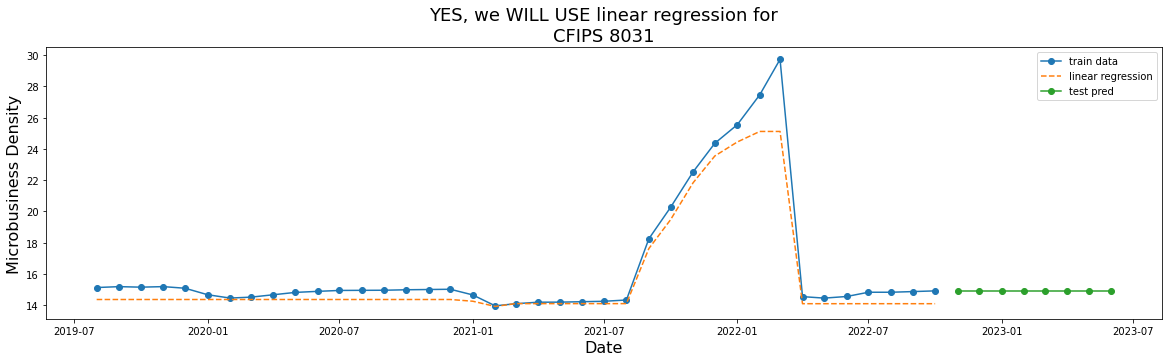

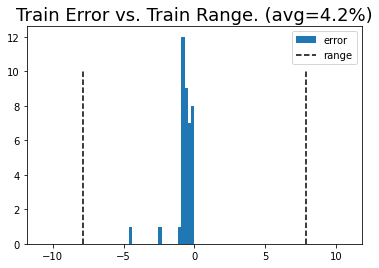








[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:50] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:51] WARNING: ../src/objective/regr

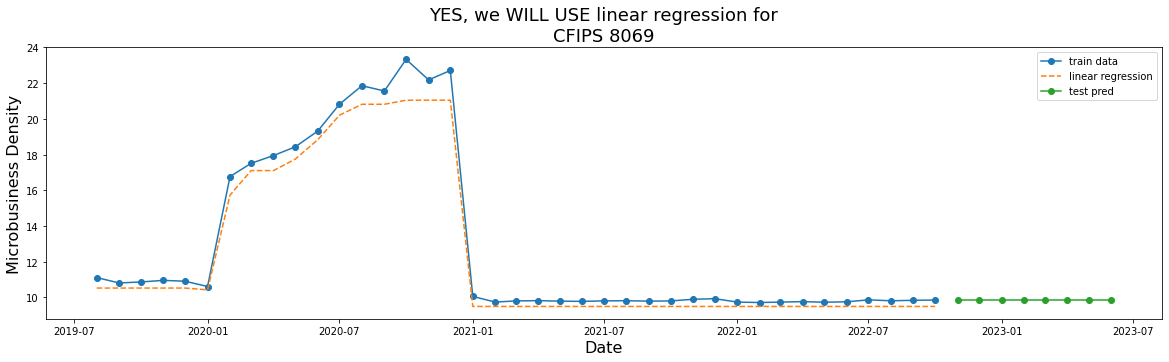

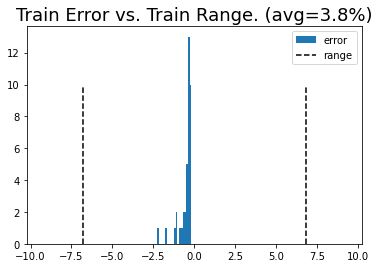








[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:52] WARNING: ../src/objective/regr

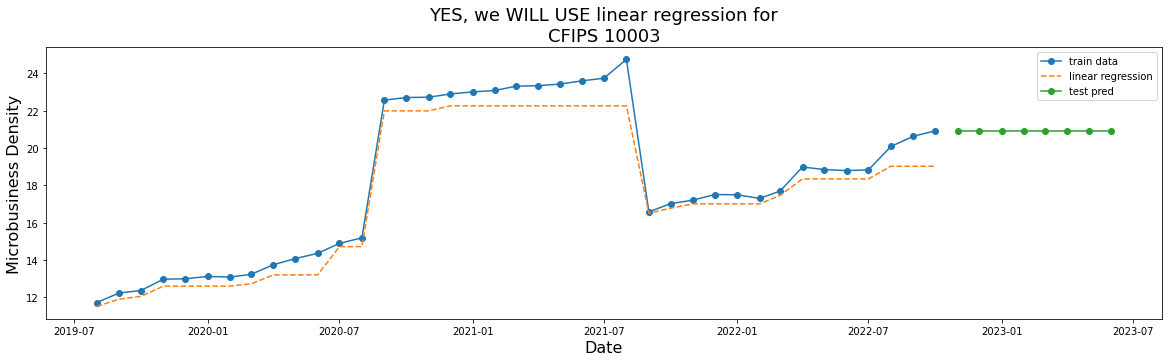

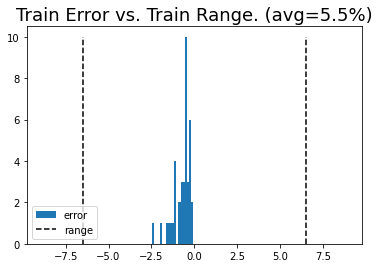








[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


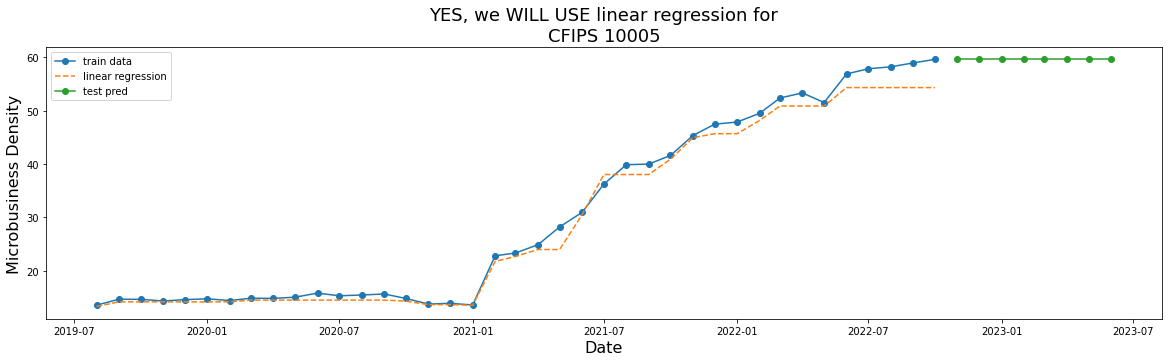

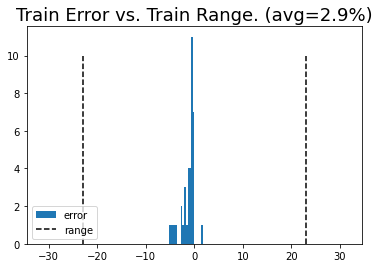








[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:56] WARNING: ../src/objective/regr

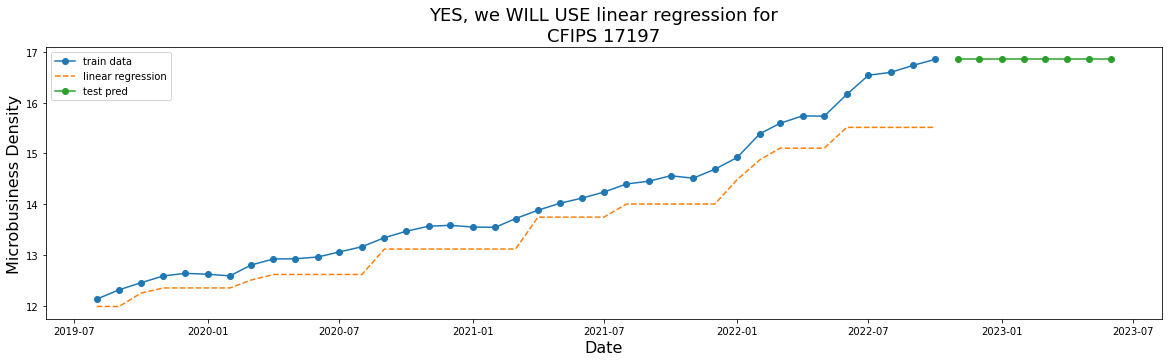

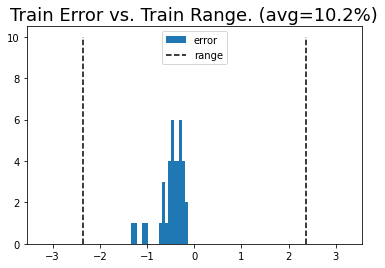








[03:50:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:20] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:20] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:20] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:20] WARNING: ../src/objective/regr

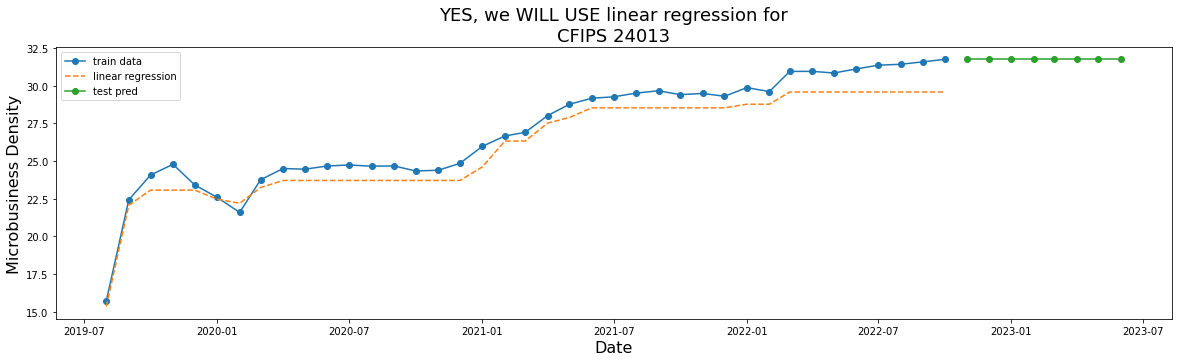

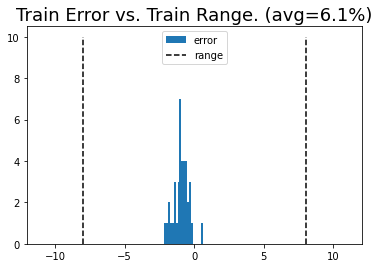








[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:50:52] WARNING: ../src/objective/regr

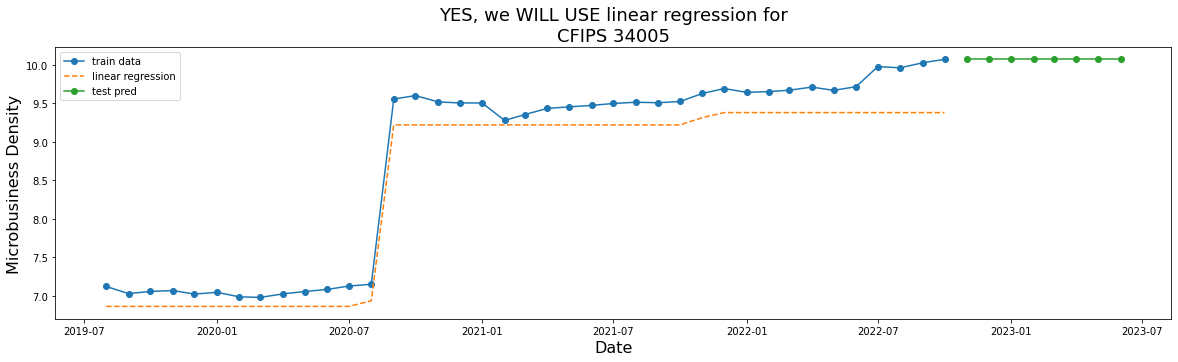

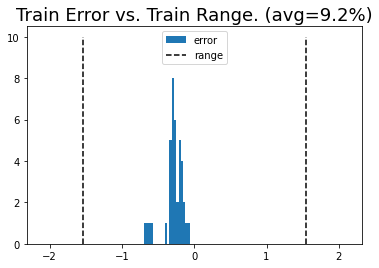








[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:29] WARNING: ../src/objective/regr

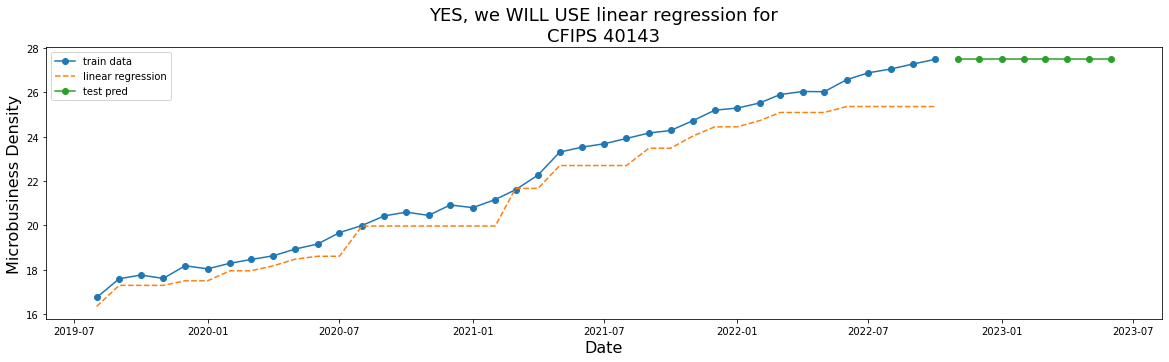

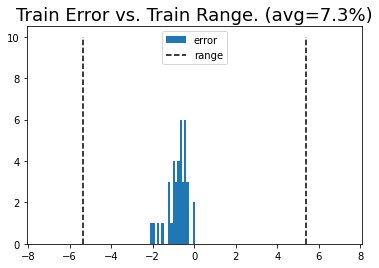








[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:56] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:57] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:57] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:57] WARNING: ../src/objective/regr

In [19]:
DISPLAY = 8
THRESHOLD = 0.103 #this is 10.3% same value as 8/78 from old notebook
ACTIVE_THRESHOLD = 25_000

IDS = train.cfips.unique()
x_train = np.arange(39).reshape((-1,1))
x_test = np.arange(38,47).reshape((-1,1))

preds = np.zeros((len(IDS),8))
last_preds = np.zeros((len(IDS),8))
lin_trend = 0

ct = 0
for i,c in enumerate(IDS):
    df = train.loc[train.cfips==c]
    last = df.microbusiness_density.values[-1]
    active = df.active.values[-1]
    last_preds[i,] = [last]*8
    
    # FIT XGBoost Model
    #model = LinearRegression()
    #model.fit(x_train,df.microbusiness_density)
    #p = model.predict(x_train)
    
    # Fitting the model
    xgb_r.fit(x_train, df.microbusiness_density)
  
    # Predict the model
    p = xgb_r.predict(x_train)
    
    # COMPUTE TRAIN ERROR
    err = p - df.microbusiness_density.values
    rng = df.microbusiness_density.max() - df.microbusiness_density.min()
    
    # DETERMIN IF TIME SERIES IS LINEAR OR NOT
    s = 0
    for k in range(39):
        e = np.abs( err[k] )
        r = e/rng # absolute error divided by range
        s += r
    s = s/39 # now S is MAPE mean absolute percentage error
    
    # IF S <= 10% THEN WE ASSUME THIS COUNTY HAS A LINEAR TREND
    if (s>THRESHOLD)|(active<ACTIVE_THRESHOLD): 
        preds[i,] = [last]*8
        continue
        
    # INFER TEST DATA WITH LINEAR REGRESSION
    p2 = xgb_r.predict(x_test)
    shift =  last - p2[0]
    preds[i,] = p2[1:]+shift
    
    # COUNT STUFF
    ct += 1
    lin_trend += 1
    if ct>=DISPLAY+1: continue
        
    # PLOT STUFF
    plt.figure(figsize=(20,5))
    plt.plot(df.first_day_of_month,df.microbusiness_density,'-o',label='train data')
    plt.plot(df.first_day_of_month,p,'--',label='linear regression')
    plt.plot(test.first_day_of_month.values[:8],preds[i,],'-o',label='test pred')
    pre='YES, we WILL USE linear regression for\n'
    plt.title(f'{pre}CFIPS {c}',size=18)
    plt.xlabel('Date',size=16)
    plt.ylabel('Microbusiness Density',size=16)
    plt.legend()
    plt.show()
    
    plt.hist(err,bins=20,label='error')
    plt.plot([-rng/2,-rng/2],[0,10],'--',color='black',label='range')
    plt.plot([rng/2,rng/2],[0,10],'--',color='black')
    plt.xlim((-rng * 0.75,rng * 0.75))
    plt.legend()
    plt.title(f'Train Error vs. Train Range. (avg={100*s:2.1f}%)',size=18)
    plt.show()
    print('\n\n\n\n\n\n')
    
# PRINT HOW MANY LINEAR TIME SERIES WE FOUND
print(f'There are {lin_trend} counties with both a linear trend and large population.')

In [20]:
test['microbusiness_density'] = preds.reshape((-1))
sub = test[['row_id','microbusiness_density']]
sub.to_csv('submission.csv',index=False)
print( sub.shape )
sub.head()

(25080, 2)


,row_id,microbusiness_density
0,1001_2022-11-01,3.463856
1,1001_2022-12-01,3.463856
2,1001_2023-01-01,3.463856
3,1001_2023-02-01,3.463856
4,1001_2023-03-01,3.463856
